# Predicting sentiments for IMDB data

using Bi-Directional LSTM

# 1- Import key Modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2-Loading and preparing data

In [5]:
from keras.datasets import imdb
max_words = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [6]:
print("X_train length: ", len(x_train))
print("X_test length: ", len(x_test))

X_train length:  25000
X_test length:  25000


In [7]:
word_to_index = imdb.get_word_index()
index_to_word = {v: k for k, v in word_to_index.items()}

In [8]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
print(" ".join([index_to_word[x] for x in x_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then

In [10]:
print("Min value:", min(y_train), "Max value:", max(y_train))

Min value: 0 Max value: 1


### 2.1.average and median

In [11]:
import numpy as np

average_length = np.mean([len(x) for x in x_train])
median_length = sorted([len(x) for x in x_train])[len(x_train) // 2]

In [12]:
print("Average sequence length: ", average_length)
print("Median sequence length: ", median_length)

Average sequence length:  238.71364
Median sequence length:  178


so we shall keep sentence length somewhat close to these values. I will go for average length and hence , sentence lenth will be 240

### 2.2.Embedding sequence i.e padding

In [13]:
max_sequence_length = 240

from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=max_sequence_length, padding='post', truncating='post')
x_test = sequence.pad_sequences(x_test, maxlen=max_sequence_length, padding='post', truncating='post')

print('X_train shape: ', x_train.shape)

X_train shape:  (25000, 240)


# 3- Model Building

In [14]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dense
from keras.callbacks import EarlyStopping

### 3.1.Single layer Bi-Directional LSTM Model

In [15]:
hidden_size = 32

sl_model = Sequential()
sl_model.add(Embedding(max_words, hidden_size))
sl_model.add(Bidirectional(LSTM(hidden_size, activation='tanh', dropout=0.2, recurrent_dropout=0.2)))
sl_model.add(Dense(1, activation='sigmoid'))
sl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
sl_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 656,705
Trainable params: 656,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##### Summary params calculation
https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

There are three steps:

- For embedding layer: Dim of embedded layer(20000) * hidden_layer(32)

- For LSTM Layer: Now formula is #of params=g*[h(h+i)+biase]

where g=lstm layer length i.e 1. For FFNS, RNN has 1 , LSTM has 4 and GRU has 3 layers<br>
h=hidden layer size (number of neurons in hidden layer) i.e 100<br>
i=Input size/dimension i.e embedding_vector_features that is coming as an input on lstm layer in step2 (40 is value)<br>
biase= 100 of neurons for outpt of lstm layer<br>

2*(4*[100(100+40)+100])

- For Dense (Output): lstm layer acting as input(32) * Bidirectional layer(2)* neurons in output layer(1) + biase(2 as there is only one neuron in output layer)=65

In [17]:
epochs = 3
batch_size=16

sl_model.fit(x_train, y_train,validation_data=(x_test,y_test),
             callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)],
             epochs=epochs, batch_size=batch_size, shuffle=True)


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 188s 8ms/step - loss: 0.5428 - accuracy: 0.7286 - val_loss: 0.4716 - val_accuracy: 0.7815
Epoch 2/3
25000/25000 [==============================] - 243s 10ms/step - loss: 0.3903 - accuracy: 0.8378 - val_loss: 0.4590 - val_accuracy: 0.7948
Epoch 3/3
25000/25000 [==============================] - 243s 10ms/step - loss: 0.3354 - accuracy: 0.8648 - val_loss: 0.4509 - val_accuracy: 0.8027


In [18]:
loss, acc = sl_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 14s 563us/step


In [19]:
print('Single layer model -- ACC {} -- LOSS {}'.format(acc, loss))

Single layer model -- ACC 0.8027200102806091 -- LOSS 0.45086339970588685


### 3.2.Stacked Layer Bi-Directional LSTM

In [20]:
d_model = Sequential()
d_model.add(Embedding(max_words, hidden_size))
d_model.add(Bidirectional(LSTM(hidden_size, activation='tanh', dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
d_model.add(Bidirectional(LSTM(hidden_size, activation='tanh', dropout=0.2, recurrent_dropout=0.2)))
d_model.add(Dense(1, activation='sigmoid'))
d_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
d_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 64)          16640     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 681,537
Trainable params: 681,537
Non-trainable params: 0
_________________________________________________________________


In [22]:
history=d_model.fit(x_train, y_train,validation_data=(x_test,y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)],
                    epochs=epochs, batch_size=batch_size, shuffle=True)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 372s 15ms/step - loss: 0.5074 - accuracy: 0.7556 - val_loss: 0.4359 - val_accuracy: 0.7962
Epoch 2/3
25000/25000 [==============================] - 418s 17ms/step - loss: 0.3742 - accuracy: 0.8409 - val_loss: 0.4656 - val_accuracy: 0.7872
Epoch 3/3
25000/25000 [==============================] - 352s 14ms/step - loss: 0.2960 - accuracy: 0.8836 - val_loss: 0.4644 - val_accuracy: 0.8036


In [23]:
d_loss, d_acc = d_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 26s 1ms/step


In [24]:
print('Single layer model -- ACC {} -- LOSS {}'.format(acc, loss))
print('Double layer model -- ACC {} -- LOSS {}'.format(d_acc, d_loss))

Single layer model -- ACC 0.8027200102806091 -- LOSS 0.45086339970588685
Double layer model -- ACC 0.8036400079727173 -- LOSS 0.46437607595443725


### 3.3.Plotting results

from stacked layer

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

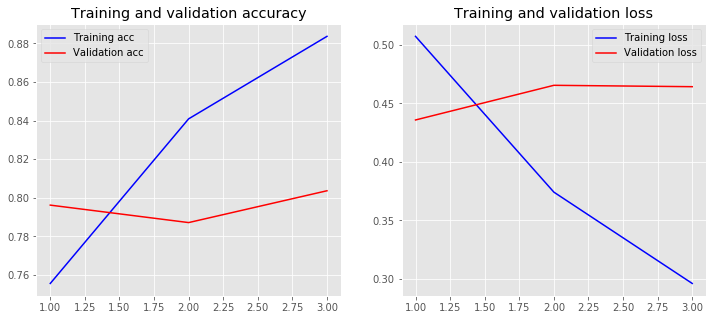

In [26]:
plot_history(history)

### 3.4.weights at each step of neural network 

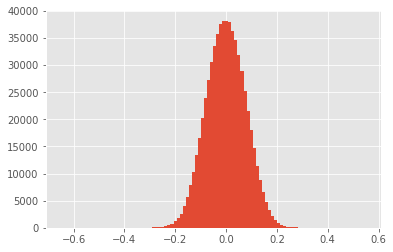

In [27]:
plt.hist(d_model.get_weights()[0].ravel(),100)
plt.show()

In [28]:
d_model.weights

[<tf.Variable 'embedding_2/embeddings:0' shape=(20000, 32) dtype=float32, numpy=
 array([[-0.13250807, -0.00877306, -0.12959325, ..., -0.01818903,
         -0.0169142 ,  0.04446626],
        [-0.00692954, -0.05006743,  0.03962235, ...,  0.00584403,
          0.03414401, -0.04210797],
        [-0.09210034, -0.00112131, -0.07348678, ..., -0.01964563,
         -0.01152271, -0.00544168],
        ...,
        [-0.02681631,  0.03631673,  0.01677416, ..., -0.06797646,
         -0.04182611,  0.00500199],
        [ 0.03655662, -0.04832474,  0.01081854, ..., -0.00314344,
          0.02775599, -0.08082322],
        [ 0.05869017, -0.11836132,  0.07008013, ...,  0.02570499,
          0.08565921, -0.13665749]], dtype=float32)>,
 <tf.Variable 'bidirectional_2/forward_lstm_2/kernel:0' shape=(32, 128) dtype=float32, numpy=
 array([[-0.13802971, -0.06240958,  0.06171766, ..., -0.02881485,
          0.18903835,  0.11378402],
        [ 0.02465504,  0.11358521, -0.02186728, ..., -0.13362221,
          0.06